In [2]:
import pandas as pd
import re
from unidecode import unidecode
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sql=pd.read_csv('C:\\Users\\12263\\booking_details_Exported.csv', low_memory=False)
hotel=pd.read_csv('C:\\Users\\12263\\Hotel_Exported.csv', low_memory=False)
region=pd.read_csv('C:\\Users\\12263\\region_exported.csv', low_memory=False)
customer=pd.read_csv('C:\\Users\\12263\\customer_exported.csv', low_memory=False)
flight=pd.read_csv('C:\\Users\\12263\\flight_exported.csv', low_memory=False)

# 1. Revenue Analysis

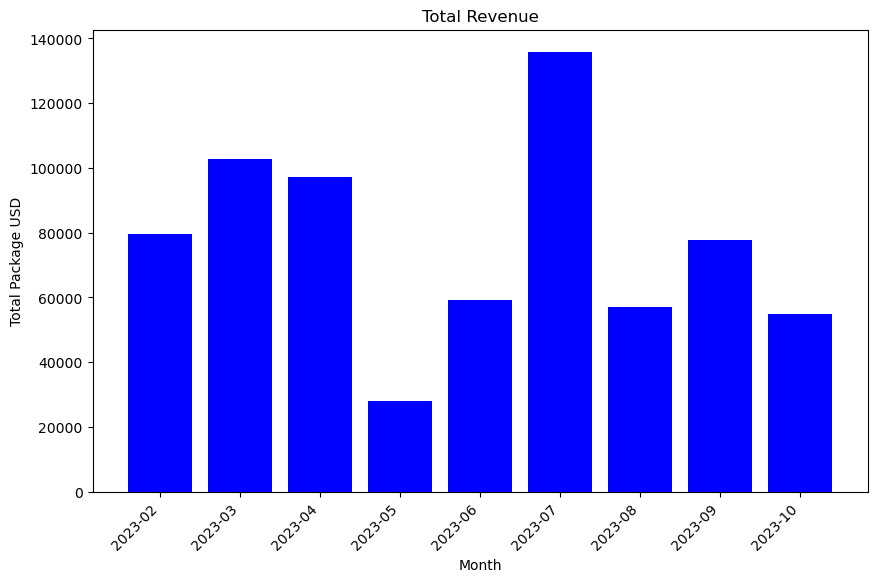

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(sql)
df['booking_date'] = pd.to_datetime(df['booking_date'])

df['month_year'] = df['booking_date'].dt.to_period('M')

monthly_revenue = df.groupby('month_year')['total_package_usd'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(monthly_revenue['month_year'].astype(str), monthly_revenue['total_package_usd'], color='b')
plt.title('Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Package USD')
plt.xticks(rotation=45, ha='right') 
plt.show()


# 2. Geographical Revenue Distribution Analysis:

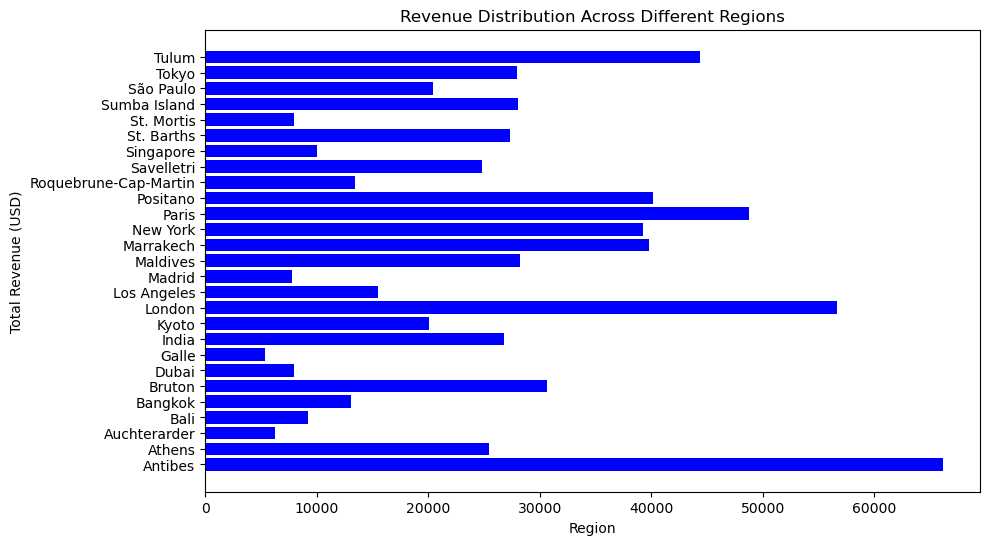

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.merge(sql, region, on='region_id')

region_wise_revenue = merged_df.groupby('region_name')['total_package_usd'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(region_wise_revenue['region_name'], region_wise_revenue['total_package_usd'], color='b')
plt.title('Revenue Distribution Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.show()


# 3. Seasonal Revenue Fluctuations (Identify revenue fluctuations based on seasons):

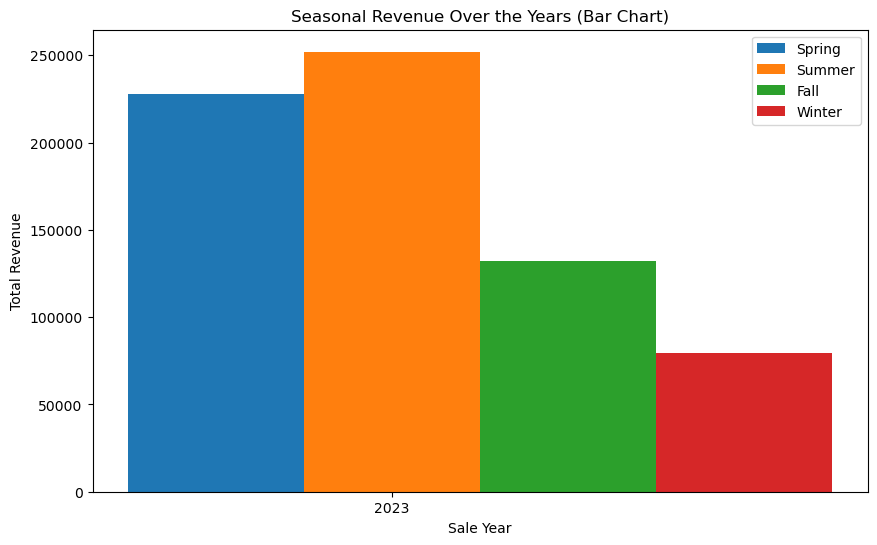

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql)
Booking_Details['booking_date'] = pd.to_datetime(Booking_Details['booking_date'])

CTE_Seasonal_Revenue = Booking_Details.copy()
CTE_Seasonal_Revenue['Season'] = CTE_Seasonal_Revenue['booking_date'].dt.month.map({
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter',
    1: 'Winter',
    2: 'Winter'
})
CTE_Seasonal_Revenue['Sale_Year'] = CTE_Seasonal_Revenue['booking_date'].dt.year
CTE_Seasonal_Revenue = CTE_Seasonal_Revenue.groupby(['Sale_Year', 'Season']).agg(Total_Revenue=('total_package_usd', 'sum')).reset_index()

plt.figure(figsize=(10, 6))
bar_width = 0.2
bar_positions = range(len(CTE_Seasonal_Revenue['Sale_Year'].unique()))

for i, season in enumerate(['Spring', 'Summer', 'Fall', 'Winter']):
    season_data = CTE_Seasonal_Revenue[CTE_Seasonal_Revenue['Season'] == season]
    plt.bar([pos + i * bar_width for pos in bar_positions], season_data['Total_Revenue'], width=bar_width, label=season)

plt.xlabel('Sale Year')
plt.ylabel('Total Revenue')
plt.title('Seasonal Revenue Over the Years (Bar Chart)')
plt.xticks([pos + bar_width for pos in bar_positions], CTE_Seasonal_Revenue['Sale_Year'].unique())
plt.legend()
plt.show()


# 4. Monthly Revenue Forecasting and Deviation Analysis:

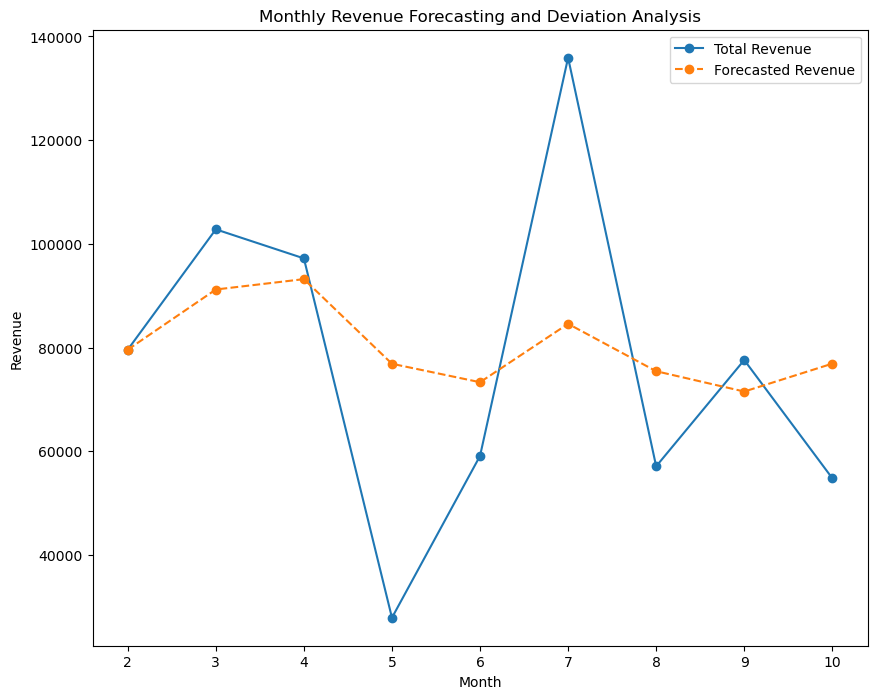

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql)  
Booking_Details['booking_date'] = pd.to_datetime(Booking_Details['booking_date'])

CTE_Monthly_Revenue_Forecasting = (Booking_Details
                                   .groupby([Booking_Details['booking_date'].dt.year.rename('Sale_Year'),
                                             Booking_Details['booking_date'].dt.month.rename('Sale_Month')])
                                   .agg(Total_Revenue=('total_package_usd', 'sum'))
                                   .reset_index())

CTE_Monthly_Revenue_Forecasting['Forecasted_Revenue'] = CTE_Monthly_Revenue_Forecasting['Total_Revenue'].rolling(window=5, min_periods=1).mean().round(2)
CTE_Monthly_Revenue_Forecasting['Deviation_Percentage'] = ((CTE_Monthly_Revenue_Forecasting['Total_Revenue'] - CTE_Monthly_Revenue_Forecasting['Forecasted_Revenue']) / CTE_Monthly_Revenue_Forecasting['Forecasted_Revenue'] * 100).round(2)

plt.figure(figsize=(10, 8))

plt.plot(CTE_Monthly_Revenue_Forecasting['Sale_Month'], CTE_Monthly_Revenue_Forecasting['Total_Revenue'], label='Total Revenue', marker='o')
plt.plot(CTE_Monthly_Revenue_Forecasting['Sale_Month'], CTE_Monthly_Revenue_Forecasting['Forecasted_Revenue'], label='Forecasted Revenue', linestyle='--', marker='o')

plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Forecasting and Deviation Analysis')
plt.legend()
plt.show()



# 5. Customer Spending Analysis:

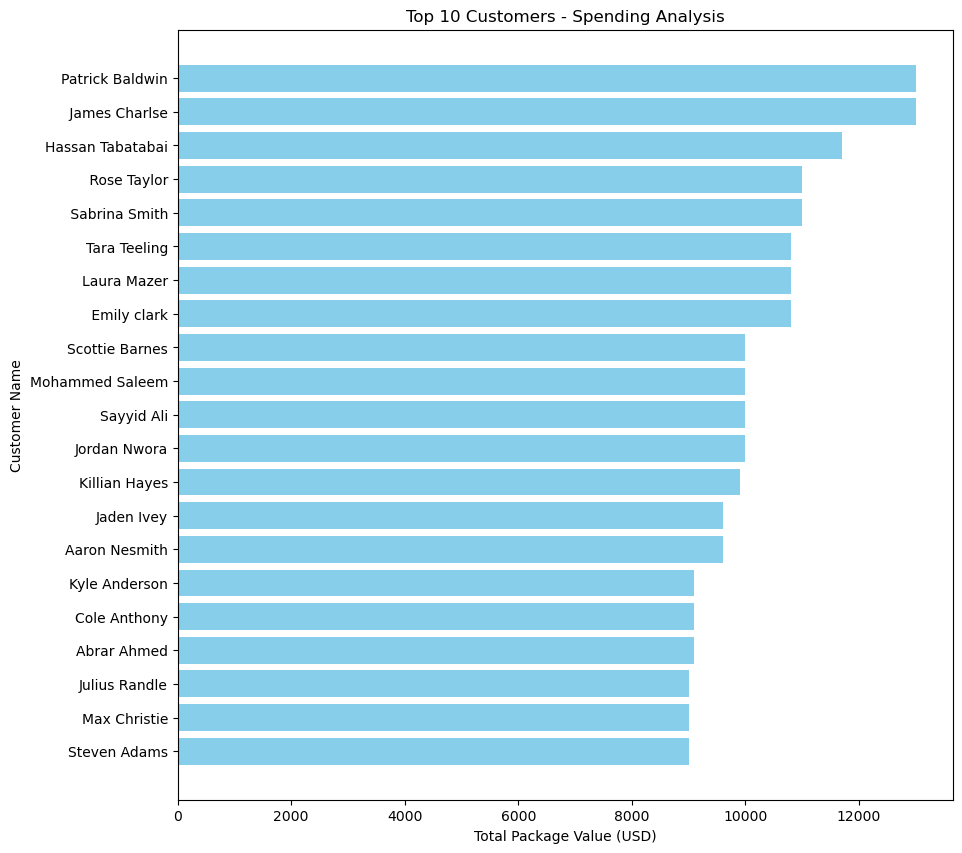

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql)
Customer = pd.DataFrame(customer)

CustomerSpending = (Booking_Details
                    .merge(Customer, on='customer_id', how='left')
                    .groupby(['customer_id', 'customer_name', 'email'])
                    .agg(Total_Package_Value=('total_package_usd', 'sum'))
                    .reset_index())

CustomerSpending['Spending_Rank'] = CustomerSpending['Total_Package_Value'].rank(ascending=False, method='dense')

top_10_customers = CustomerSpending.nlargest(21, 'Total_Package_Value')

plt.figure(figsize=(10, 10))
plt.barh(top_10_customers['customer_name'], top_10_customers['Total_Package_Value'], color='skyblue')
plt.xlabel('Total Package Value (USD)')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers - Spending Analysis')
plt.gca().invert_yaxis()  
plt.show()


# 6. Feedback-based Preference Analysis:

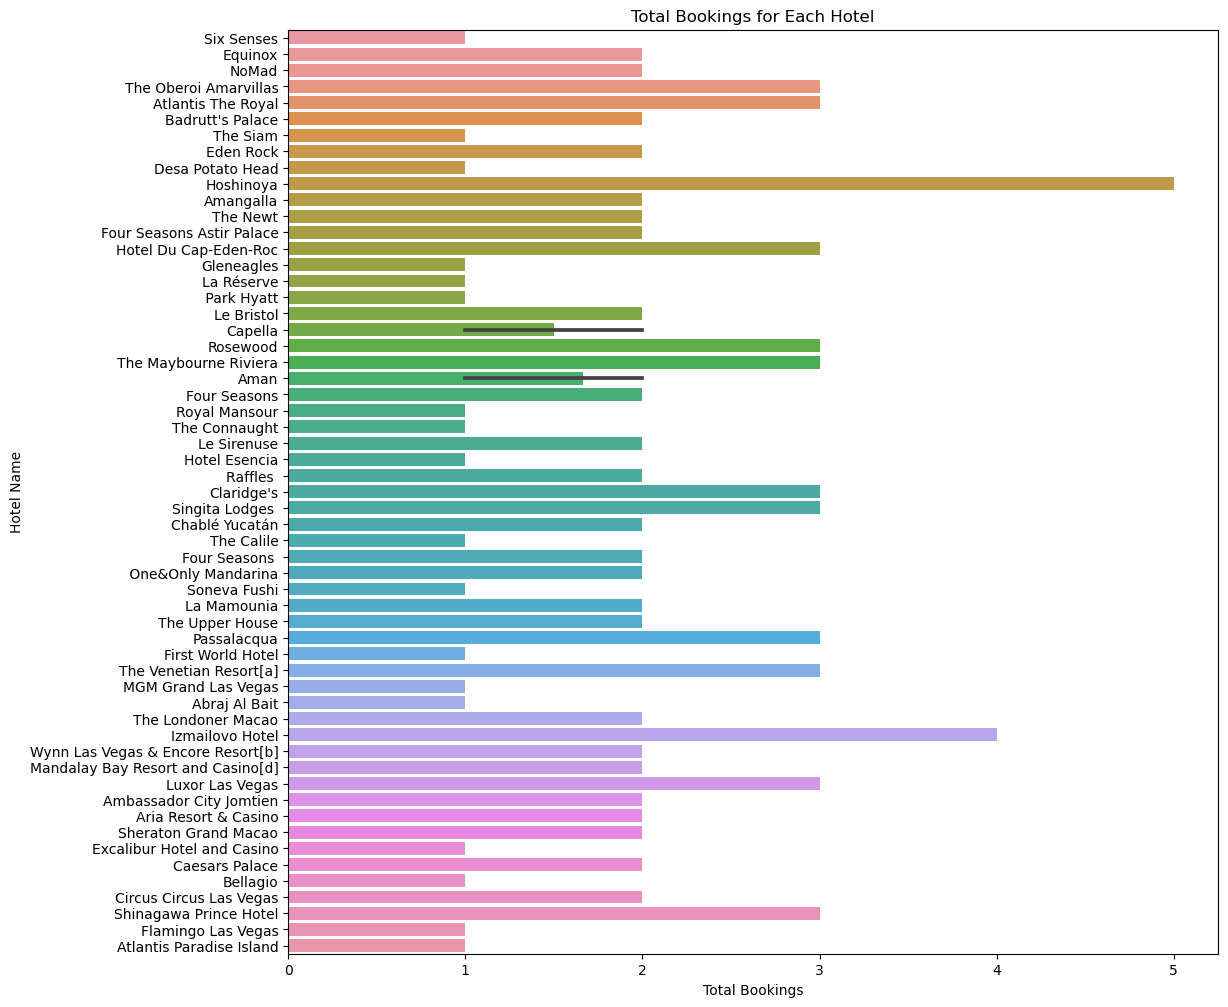

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Hotel = pd.DataFrame(hotel)  
Booking_Details = pd.DataFrame(sql) 

merged_data = pd.merge(Hotel, Booking_Details, on='hotel_id', how='inner')

total_bookings_per_hotel = merged_data.groupby(['hotel_id', 'hotel_name']).size().reset_index(name='Total_Bookings')

plt.figure(figsize=(12, 12))
sns.barplot(x='Total_Bookings', y='hotel_name', data=total_bookings_per_hotel, orient='h')
plt.title('Total Bookings for Each Hotel')
plt.xlabel('Total Bookings')
plt.ylabel('Hotel Name')
plt.show()


# 7. Travel Class Preference Analysis by Expenditure:

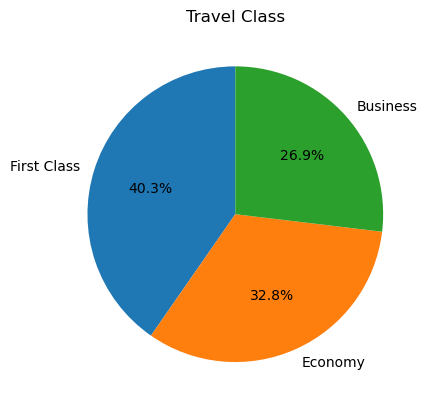

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

travel_class_counts = sql['travel_class'].value_counts()

plt.pie(travel_class_counts, labels=travel_class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Travel Class')
plt.show()


# 8. Booking Preference Analysis:

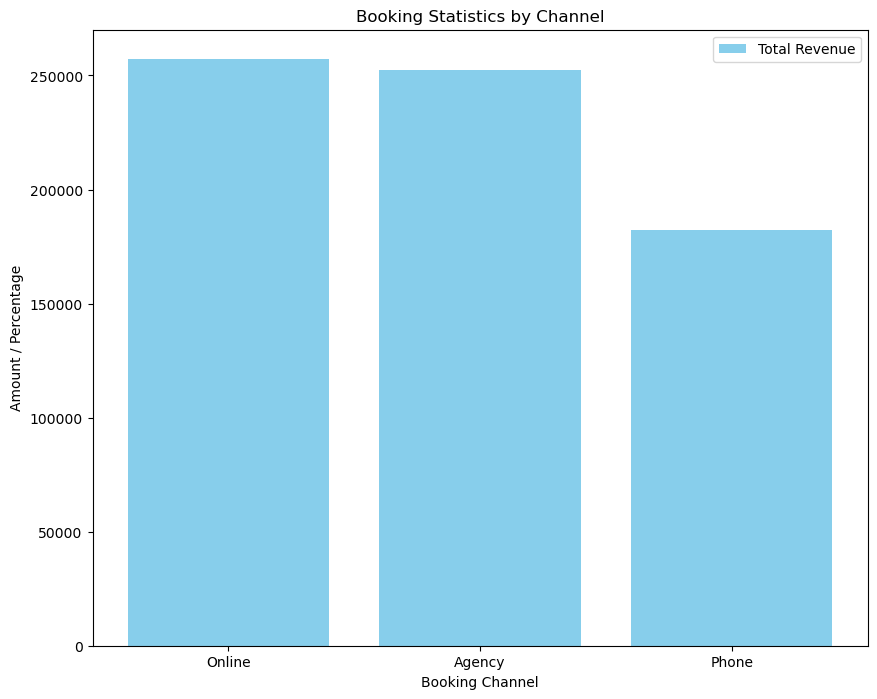

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql)

Booking_Channel_Stats = (Booking_Details
                         .groupby('booking_channel')
                         .agg(Total_Bookings=('booking_id', 'count'),
                              Total_Revenue=('total_package_usd', 'sum'),
                              Avg_Revenue_Per_Booking=('total_package_usd', 'mean'))
                         .reset_index())

Booking_Channel_Stats['Revenue_Contribution_Percentage'] = round((Booking_Channel_Stats['Total_Revenue'] / Booking_Channel_Stats['Total_Revenue'].sum()) * 100, 2)

Booking_Channel_Stats = Booking_Channel_Stats.sort_values(by='Total_Revenue', ascending=False)

plt.figure(figsize=(10, 8))

plt.bar(Booking_Channel_Stats['booking_channel'], Booking_Channel_Stats['Total_Revenue'], color='skyblue', label='Total Revenue')

plt.xlabel('Booking Channel')
plt.ylabel('Amount / Percentage')
plt.title('Booking Statistics by Channel')
plt.legend()
plt.show()


# 9. Seasonal Booking Trends Analysis:

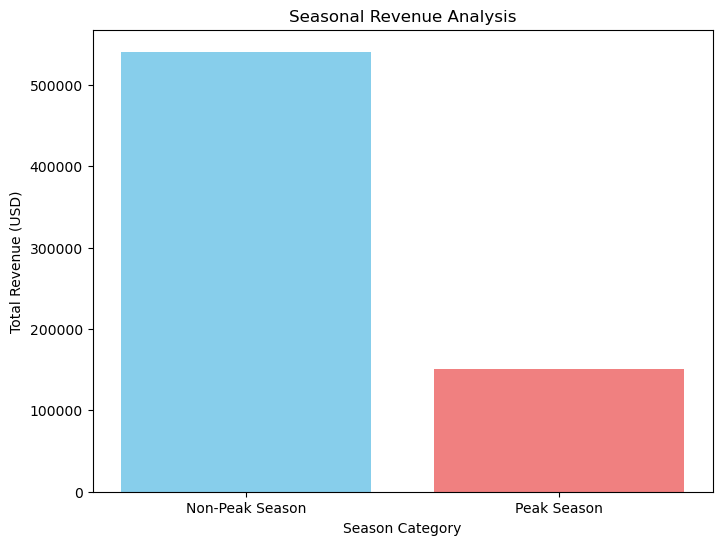

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql)  
Booking_Details['travel_date'] = pd.to_datetime(Booking_Details['travel_date'])

Booking_Details['season_category'] = Booking_Details['travel_date'].dt.month.map(lambda x: 'Peak Season' if x in [7, 8, 12] else 'Non-Peak Season')

Seasonal_Revenue = Booking_Details.groupby('season_category')['total_package_usd'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(Seasonal_Revenue['season_category'], Seasonal_Revenue['total_package_usd'], color=['skyblue', 'lightcoral'])
plt.xlabel('Season Category')
plt.ylabel('Total Revenue (USD)')
plt.title('Seasonal Revenue Analysis')
plt.show()


# 10. Seasonal Revenue Analysis by Customer Premium Status

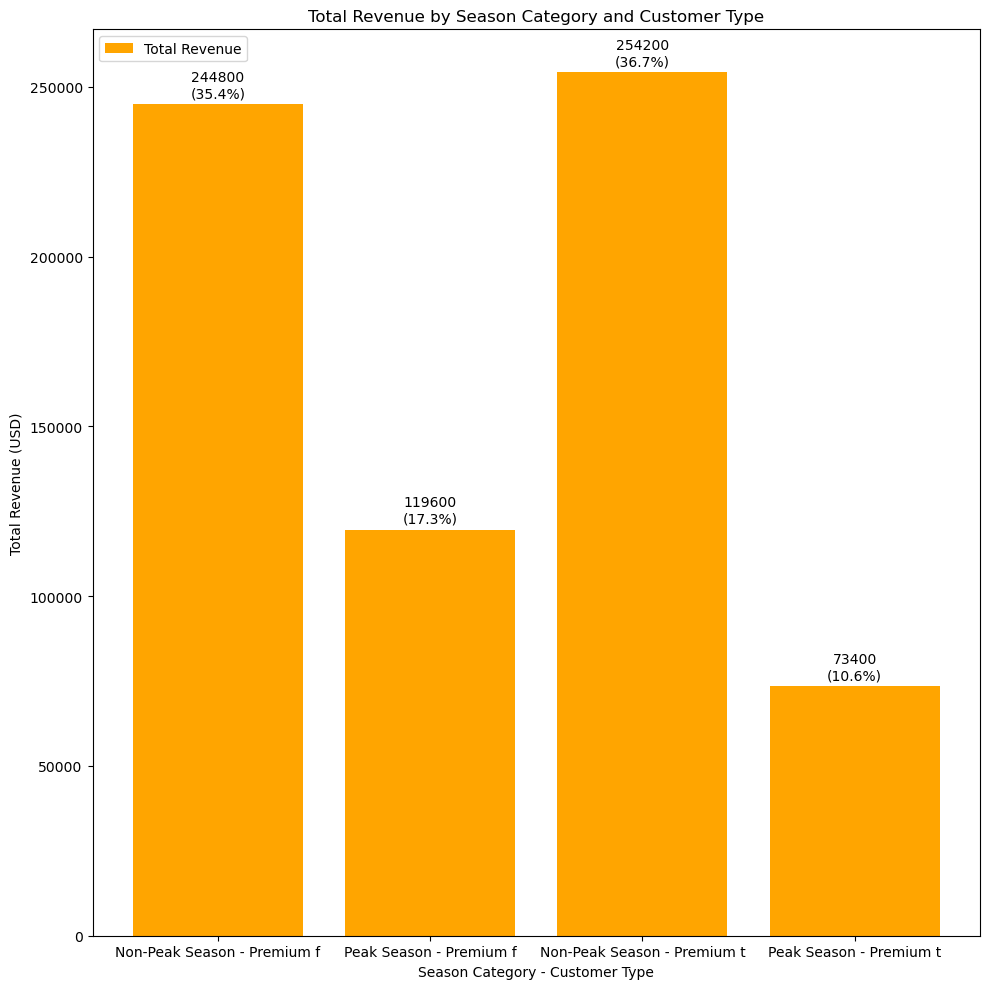

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql)
Customer = pd.DataFrame(customer)
Flight = pd.DataFrame(flight)

Booking_Details['booking_date'] = pd.to_datetime(Booking_Details['booking_date'])
Merged_Data = pd.merge(Booking_Details, Customer, on='customer_id', how='inner')

Merged_Data['season_category'] = Merged_Data['booking_date'].dt.month.apply(
    lambda month: 'Peak Season' if month in [7, 8, 12] else 'Non-Peak Season'
)

Grouped_Data = Merged_Data.groupby(['premium_member', 'season_category']).agg(
    Total_Bookings=('booking_id', 'count'),
    Total_Revenue=('total_package_usd', 'sum'),
    Avg_Revenue_Per_Booking=('total_package_usd', 'mean')
).reset_index()

total_package_sum = Merged_Data['total_package_usd'].sum()
Grouped_Data['Revenue_Contribution_Percentage'] = (
    (Grouped_Data['Total_Revenue'] / total_package_sum) * 100
).round(2)

fig, ax2 = plt.subplots(figsize=(10, 10))

bars2 = ax2.bar(Grouped_Data['season_category'] + ' - Premium ' + Grouped_Data['premium_member'].astype(str),
                Grouped_Data['Total_Revenue'], color='orange', label='Total Revenue')
ax2.set_ylabel('Total Revenue (USD)')
ax2.set_xlabel('Season Category - Customer Type')
ax2.set_title('Total Revenue by Season Category and Customer Type')
ax2.legend(loc='upper left')

for bar, percentage in zip(bars2, Grouped_Data['Total_Revenue']):
    height = bar.get_height()
    ax2.annotate(f'{percentage}\n({percentage / total_package_sum * 100:.1f}%)',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 11. Regional Revenue Comparison: Peak and Off-Peak Season Analysis

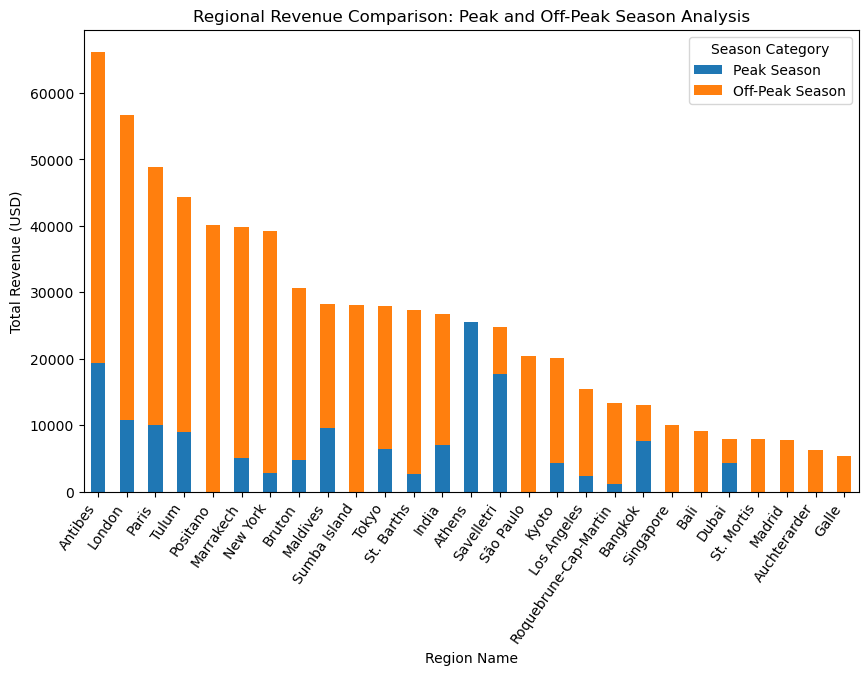

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql)  
Region = pd.DataFrame(region)  

Booking_Details['travel_date'] = pd.to_datetime(Booking_Details['travel_date'])

MonthlyRegionRevenue = pd.merge(Booking_Details, Region, on='region_id', how='inner')
MonthlyRegionRevenue['month_number'] = MonthlyRegionRevenue['travel_date'].dt.month
MonthlyRegionRevenue = MonthlyRegionRevenue.groupby(['region_name', 'month_number'])['total_package_usd'].sum().reset_index()
MonthlyRegionRevenue['season_category'] = MonthlyRegionRevenue['month_number'].apply(lambda x: 'Peak Season' if x in [7, 8, 12] else 'Off-Peak Season')

Regional_Revenue = MonthlyRegionRevenue.pivot_table(index='region_name', columns='season_category', values='total_package_usd', aggfunc='sum', fill_value=0).reset_index()
Regional_Revenue['total_combined_revenue'] = Regional_Revenue['Peak Season'] + Regional_Revenue['Off-Peak Season']
Regional_Revenue = Regional_Revenue.sort_values(by='total_combined_revenue', ascending=False)

Regional_Revenue.plot(kind='bar', x='region_name', y=['Peak Season', 'Off-Peak Season'], stacked=True, figsize=(10, 6))
plt.xlabel('Region Name')
plt.ylabel('Total Revenue (USD)')
plt.title('Regional Revenue Comparison: Peak and Off-Peak Season Analysis')
plt.legend(title='Season Category')
plt.xticks(rotation=55, ha='right')  
plt.show()


# 12. Revenue Breakdown of Top 10 Hotels by Ratings in Peak and Non-Peak Seasons

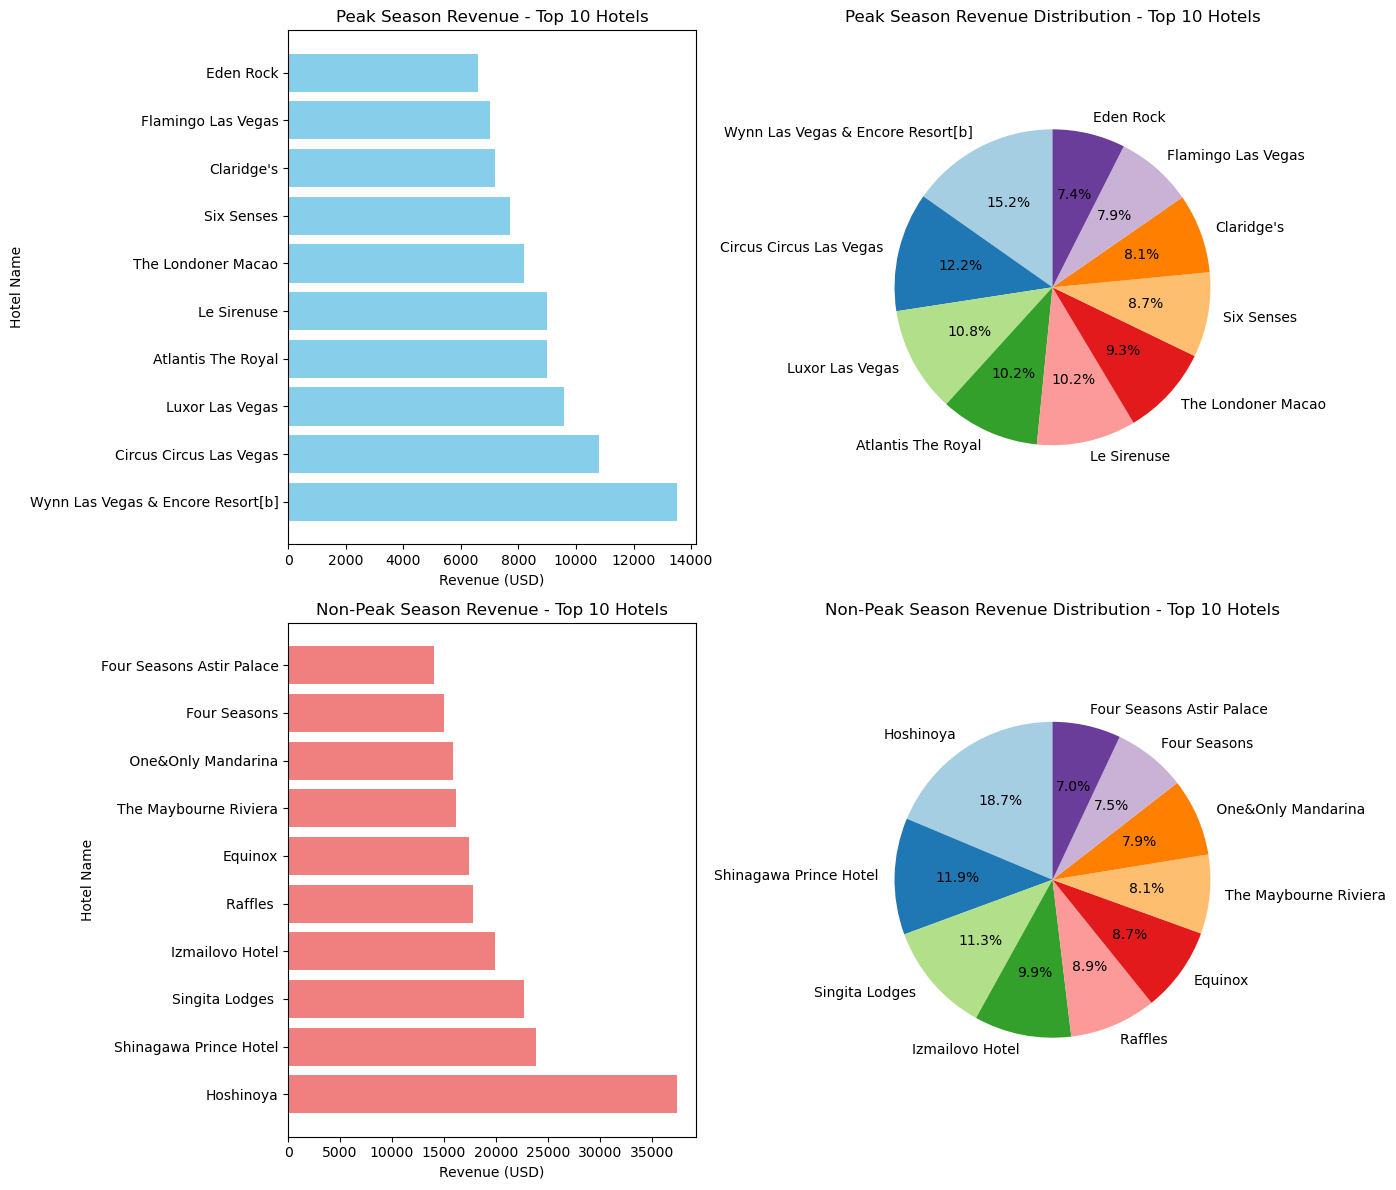

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

Hotel = pd.DataFrame(hotel)  
Booking_Details = pd.DataFrame(sql)

Booking_Details['travel_date'] = pd.to_datetime(Booking_Details['travel_date'])

Rating = Hotel[['hotel_id', 'rating', 'hotel_name', 'location']]
Rating['rating_rank'] = Rating['rating'].rank(ascending=False, method='dense') 
Rating = Rating[Rating['rating_rank'] <= 10]

Peak_Season_Revenue = Booking_Details[Booking_Details['travel_date'].dt.month.isin([7, 8, 12])]
Non_Peak_Season_Revenue = Booking_Details[~Booking_Details['travel_date'].dt.month.isin([7, 8, 12])]

Peak_Season_Revenue = Peak_Season_Revenue.groupby('hotel_id')['total_package_usd'].sum().reset_index()
Non_Peak_Season_Revenue = Non_Peak_Season_Revenue.groupby('hotel_id')['total_package_usd'].sum().reset_index()

Peak_Season_Revenue = pd.merge(Rating, Peak_Season_Revenue, on='hotel_id', how='inner', suffixes=('_rating', '_revenue'))
Non_Peak_Season_Revenue = pd.merge(Rating, Non_Peak_Season_Revenue, on='hotel_id', how='inner', suffixes=('_rating', '_revenue'))

Top_10_Peak_Season_Revenue = Peak_Season_Revenue.nlargest(10, 'total_package_usd')
Top_10_Non_Peak_Season_Revenue = Non_Peak_Season_Revenue.nlargest(10, 'total_package_usd')

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

axs[0, 0].barh(Top_10_Peak_Season_Revenue['hotel_name'], Top_10_Peak_Season_Revenue['total_package_usd'], color='skyblue')
axs[0, 0].set_ylabel('Hotel Name')
axs[0, 0].set_xlabel('Revenue (USD)')
axs[0, 0].set_title('Peak Season Revenue - Top 10 Hotels')

axs[0, 1].pie(Top_10_Peak_Season_Revenue['total_package_usd'], labels=Top_10_Peak_Season_Revenue['hotel_name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[0, 1].axis('equal')
axs[0, 1].set_title('Peak Season Revenue Distribution - Top 10 Hotels')

axs[1, 0].barh(Top_10_Non_Peak_Season_Revenue['hotel_name'], Top_10_Non_Peak_Season_Revenue['total_package_usd'], color='lightcoral')
axs[1, 0].set_ylabel('Hotel Name')
axs[1, 0].set_xlabel('Revenue (USD)')
axs[1, 0].set_title('Non-Peak Season Revenue - Top 10 Hotels')

axs[1, 1].pie(Top_10_Non_Peak_Season_Revenue['total_package_usd'], labels=Top_10_Non_Peak_Season_Revenue['hotel_name'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[1, 1].axis('equal')
axs[1, 1].set_title('Non-Peak Season Revenue Distribution - Top 10 Hotels')

plt.tight_layout()
plt.show()


# 13. Top Regions by Revenue for Each Quarter

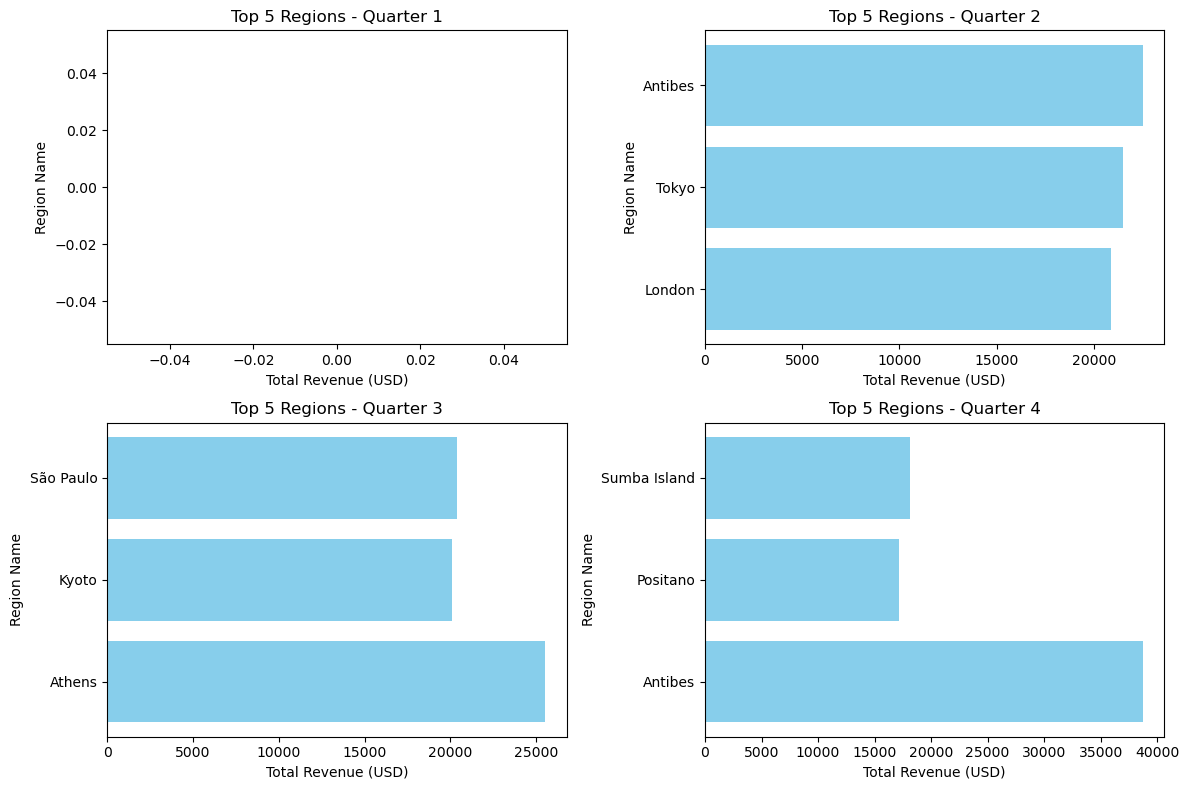

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

Region = pd.DataFrame(region) 
Booking_Details = pd.DataFrame(sql)

Booking_Details['travel_date'] = pd.to_datetime(Booking_Details['travel_date'])
Booking_Details['travel_quarter'] = Booking_Details['travel_date'].dt.quarter

Filtered_2023_Data = Booking_Details[Booking_Details['travel_date'].dt.year == 2023]

Merged_Data = pd.merge(Region, Filtered_2023_Data, on='region_id', how='inner')

Grouped_Data = Merged_Data.groupby(['travel_quarter', 'region_id', 'region_name']).agg(total_revenue=('total_package_usd', 'sum')).reset_index()

Pivot_Table = Grouped_Data.pivot_table(index=['region_id', 'region_name'], columns='travel_quarter', values='total_revenue', fill_value=0)

Top_5_Regions_by_Quarter = Pivot_Table.apply(lambda x: x.sort_values(ascending=False).head(3)).stack().reset_index(name='total_revenue')

plt.figure(figsize=(12, 8))

for quarter in range(1, 5):
    plt.subplot(2, 2, quarter)
    current_quarter_data = Top_5_Regions_by_Quarter[Top_5_Regions_by_Quarter['travel_quarter'] == quarter]
    plt.barh(current_quarter_data['region_name'], current_quarter_data['total_revenue'], color='skyblue')
    plt.xlabel('Total Revenue (USD)')
    plt.ylabel('Region Name')
    plt.title(f'Top 5 Regions - Quarter {quarter}')

plt.tight_layout()
plt.show()


# 14. Top Airlines Contribution towards Regional Revenue 

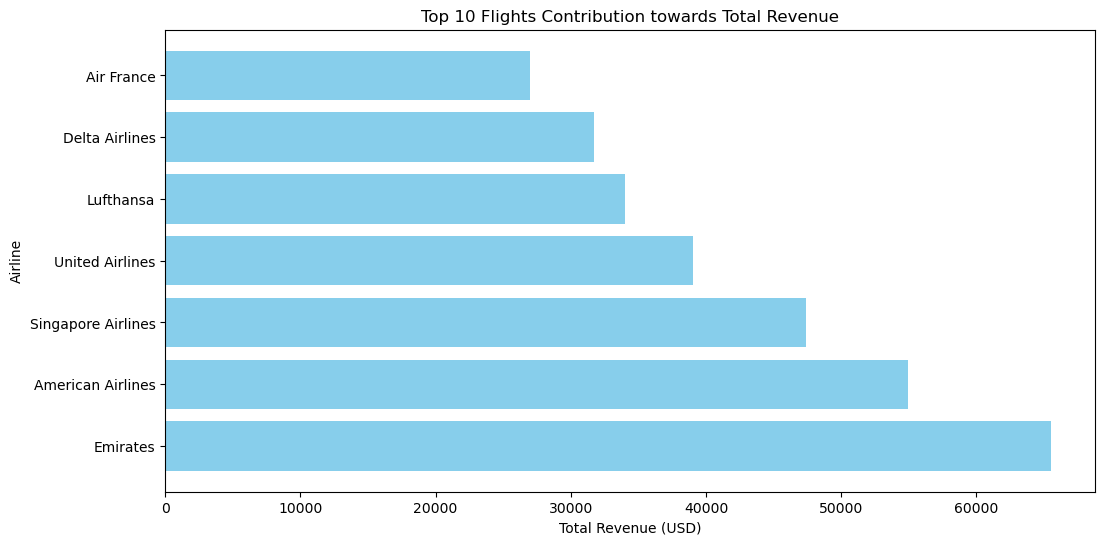

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

Region = pd.DataFrame(region)  
Booking_Details = pd.DataFrame(sql)  
Flight = pd.DataFrame(flight)  
Merged_Data = pd.merge(Region, Booking_Details, on='region_id', how='left')
Merged_Data = pd.merge(Merged_Data, Flight, on='flight_id', how='left')

Filtered_Data = Merged_Data[(Merged_Data['flight_id'].notnull()) & (Merged_Data['airline'].notnull())]

Grouped_Data = Filtered_Data.groupby(['flight_id', 'airline']).agg(total_revenue=('total_package_usd', 'sum')).reset_index()

Top_10_Flights = Grouped_Data.nlargest(10, 'total_revenue')

plt.figure(figsize=(12, 6))
plt.barh(Top_10_Flights['airline'], Top_10_Flights['total_revenue'], color='skyblue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Airline')
plt.title('Top 10 Flights Contribution towards Total Revenue')
plt.show()


# 15. Flight Meal Inclusion Revenue Analysis

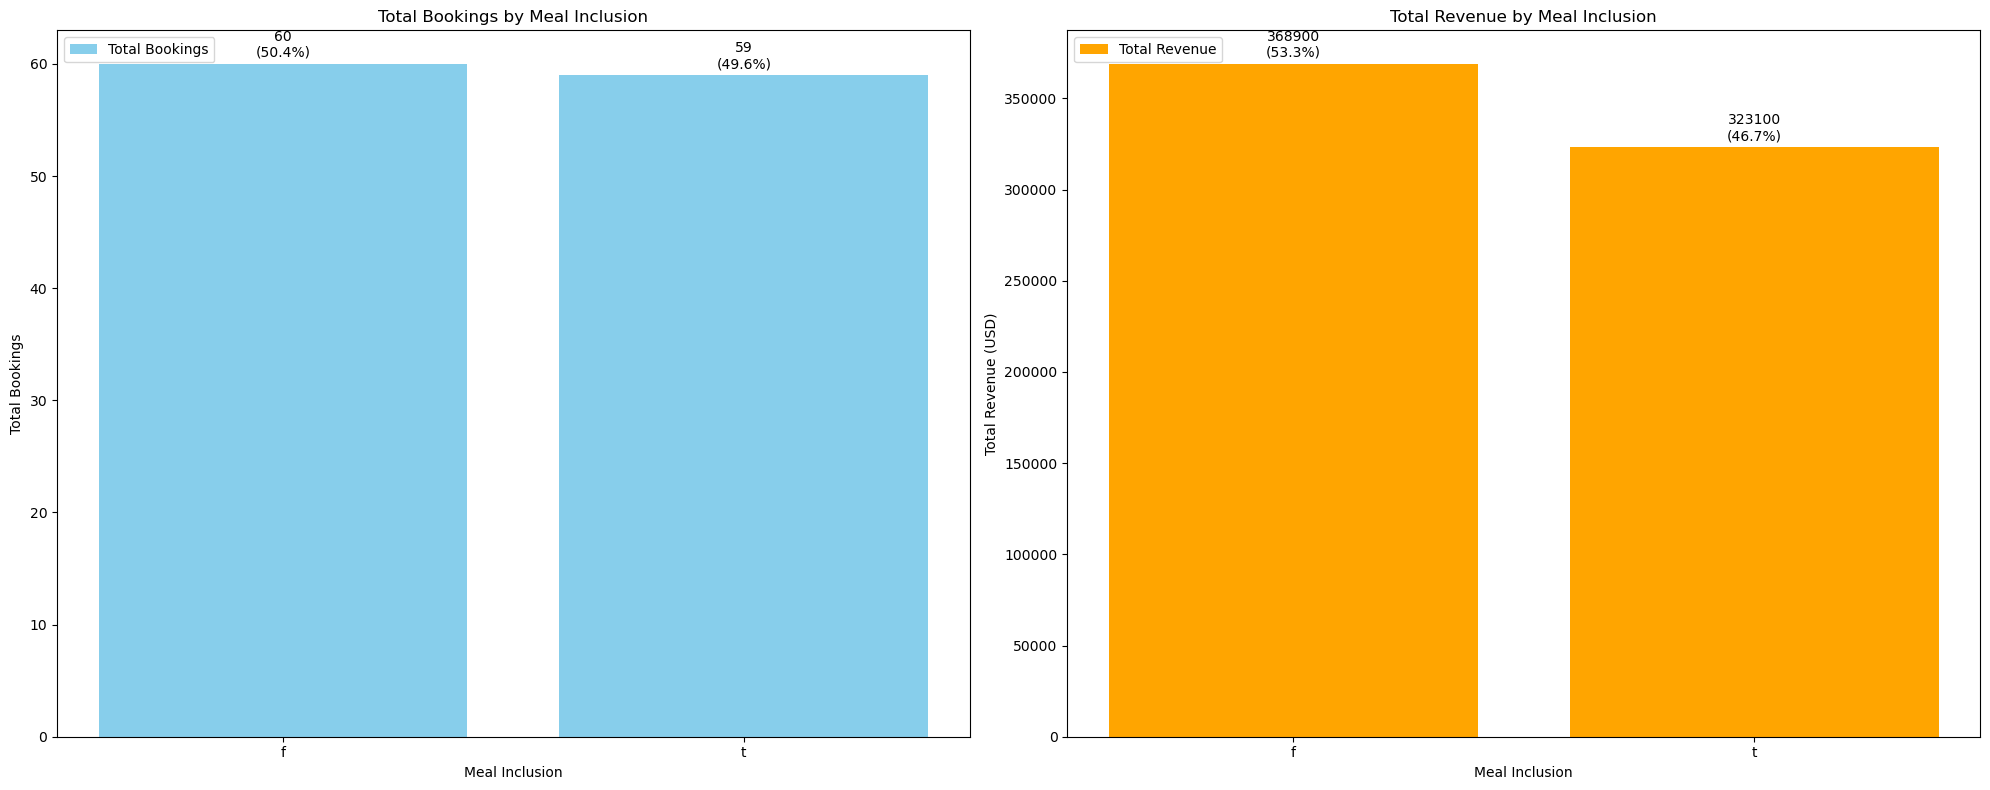

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

Booking_Details = pd.DataFrame(sql) 
Customer = pd.DataFrame(customer) 

Merged_Data = pd.merge(Booking_Details, Flight, on='flight_id', how='inner')

Grouped_Data = Merged_Data.groupby('meal_inclusion').agg(
    Total_Bookings=('booking_id', 'count'),
    Total_Revenue=('total_package_usd', 'sum'),
    Avg_Revenue_Per_Booking=('total_package_usd', 'mean')
).reset_index()

total_package_sum = Merged_Data['total_package_usd'].sum()
Grouped_Data['Revenue_Contribution_Percentage'] = (
    (Grouped_Data['Total_Revenue'] / total_package_sum) * 100
).round(2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

bars1 = ax1.bar(Grouped_Data['meal_inclusion'], Grouped_Data['Total_Bookings'], color='skyblue', label='Total Bookings')
ax1.set_ylabel('Total Bookings')
ax1.set_xlabel('Meal Inclusion')
ax1.set_title('Total Bookings by Meal Inclusion')
ax1.legend(loc='upper left')

for bar, percentage in zip(bars1, Grouped_Data['Total_Bookings']):
    height = bar.get_height()
    ax1.annotate(f'{percentage}\n({percentage/sum(Grouped_Data["Total_Bookings"])*100:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

bars2 = ax2.bar(Grouped_Data['meal_inclusion'], Grouped_Data['Total_Revenue'], color='orange', label='Total Revenue')
ax2.set_ylabel('Total Revenue (USD)')
ax2.set_xlabel('Meal Inclusion')
ax2.set_title('Total Revenue by Meal Inclusion')
ax2.legend(loc='upper left')

for bar, percentage in zip(bars2, Grouped_Data['Total_Revenue']):
    height = bar.get_height()
    ax2.annotate(f'{percentage}\n({percentage/sum(Grouped_Data["Total_Revenue"])*100:.1f}%)',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 16. Customer Revenue Segmentation Analysis

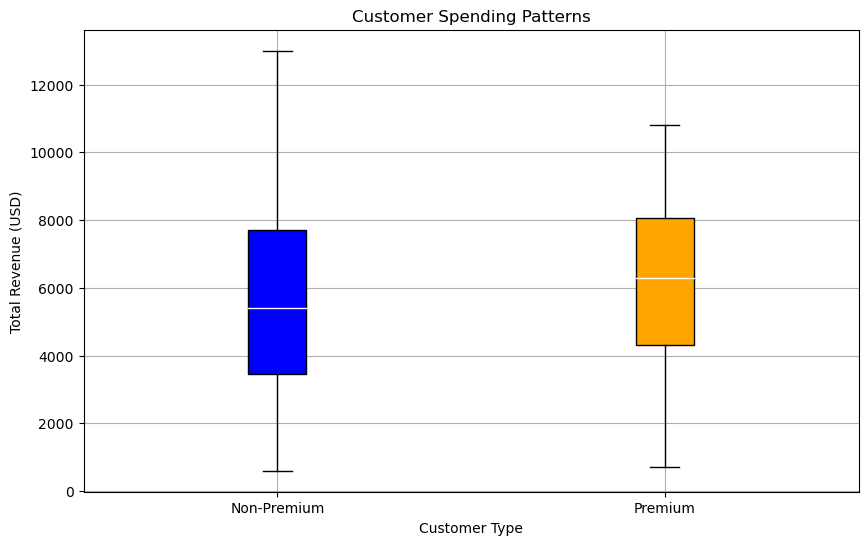

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.merge(sql, customer, on='customer_id')

premium_members = merged_df[merged_df['premium_member'] == 't']
non_premium_members = merged_df[merged_df['premium_member'] == 'f']

plt.figure(figsize=(10, 6))

colors = ['blue', 'orange']

bp = plt.boxplot([non_premium_members['total_package_usd'], premium_members['total_package_usd']],
                 labels=['Non-Premium', 'Premium'], patch_artist=True)

for box, color in zip(bp['boxes'], colors):
    box.set(facecolor=color)
for median, color in zip(bp['medians'], colors):
    median.set(color='w')

plt.title('Customer Spending Patterns')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()
